In [35]:
import numpy as np
# importar librería numpy con diminutivo np para ser llamada como tal

np.random.seed(42)
# Establecer semilla de valores aleatorios para reproducibilidad del experimiento

n = 10
# Declarar variable n con valor entero 10

A = np.random.rand(n, n)
# Generar matriz n x n (10 x 10 en este caso) con 100 números tipo float64 seleccionados aleatoriamente entre 0 y 1

b = np.random.rand(n)
# Generar vector con n (10 en este caso) números tipo float64 seleccionados aleatoriamente entre 0 y 1

alpha = 3 * n
# Declarar variable alpha el cual es n multiplicado por 3 (10 * 3 = 30)

ADD = np.dot(A, A.T) + alpha*np.identity(n)
# Se calcula el producto punto entre matriz A(10x10) y la misma traspuesta A(10x10), luego se le suma la matriz identidad 10x10 con número n (30) en la diagonal

### Determinar si tiene solución

In [36]:
# Resolver sistema de ecuaciones mediante inversa
A_invertida = np.linalg.inv(A) # calcular inversa de la matriz
x = A_invertida.dot(b) # calcular producto punto entre la inversa de la matriz y b
x

array([-1.01269542, -1.4383189 ,  1.92334288,  1.216233  , -2.05633017,
        0.75820865,  1.64963394, -1.47380018,  1.50250928,  0.17271319])

In [37]:
from sympy import Matrix
# Importar funciones para llevar a matriz a forma escalonada

AB = np.hstack((A, b.reshape(-1, 1)))

# Unir matriz A con vector b

Matrix(AB).rref()[0]

# Ejectuar función para llevar matriz aumentada a forma escalonada

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.01269541994548],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1.43831889895842],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0,  1.92334288411744],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0,  1.21623300253163],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -2.05633017203589],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.758208649758787],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0,  1.64963393527419],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0,   -1.473800176856],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0,  1.50250928376643],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.172713191310692]])

Se evidencia que el sistema de ecuaciones lineales sí tiene solución, y la solución además es única porque la matriz aumentada Ab sí puede llevarse a forma completamente escalonada

In [38]:
def es_diagonalmente_dominante(A):
    A = np.abs(np.asarray(A))  # Convertir a array numpy
    diagonales = np.diag(A)  # tomar diagonales
    filas = A - np.diag(diagonales)  # Matriz A con 0 por la diagonal
    return np.all(diagonales >= filas.sum(axis=1)) # Calcular si todos los elementos de la diagonal son mayoreso igual que la suma de las filas excluyendo la diagonal

In [39]:
es_diagonalmente_dominante(A)

False

Dado que la matriz no es diagonalmente dominante se concluye que ningún método seleccionado a continuación podrá converger, sin embargo, para efectos de convergencia y visualización del ejercicio se selecciona arbitrariamente una matriz diagonalmente dominante

In [40]:
A_2 = [[4, 1, 2],[3, 5, 1],[1, 1, 3]]
b_2 = [4,7,3]

es_diagonalmente_dominante(A_2)

True

Solución de SEL por Gauss - Seidel, Jacobi y S.O.R

In [41]:
def seidel(A, b, x):     
    n = len(A)
    for j in range(0, n):        
        # variable temporal para guardar b[j]
        d = b[j]                  
          
        # calcular x_i, y_i, z_i respectivamente
        for i in range(0, n):     
            if j != i:
                d-=A[j][i] * x[i]
        # actualizar valor para la solución        
        x[j] = d / A[j][j]
    # retornar solución aproximada          
    return x

def jacobi(A, b, x):
    D = np.diag(A)
    # Obtener diagonal de A 
    R = A - np.diagflat(D)
    # Obtener valor R para obtener producto punto con x y actualizar aproximación
    x = (b - np.dot(R,x))/D
    # actualizar valor para solución
    return x

def sor(A, b, x):
    omega = 0.5
    # factor de relajación
    for i in range(A.shape[0]):
        sigma = 0
        for j in range(A.shape[1]):
            if j != i:
                sigma += A[i][j] * x[j]
                # Valor sigma para actualizar valor en x
        x[i] = (1 - omega) * x[i] + (omega / A[i][i]) * (b[i] - sigma)
        # actualizar valor de x
    return x

def obtener_error(func, A, b):
    errores = []
    # Iniciar lista para almacenar errores
    x = [0, 0, 0]
    # Valor x inicial
    tolerancia = 10**-16
    error = np.linalg.norm(np.matmul(A, x) - b)
    # Primer error
    for n in range(100):
        # Hasta un máximo de 100 iteraciones
        if not error < tolerancia:
            # Si el error no es menor que la tolerancia
            x = func(A, b, x)
            # obtener primer resultado
            error = np.linalg.norm(np.matmul(A, x) - b)
            errores.append(error)
            # insertar error en lista para almacenar errores
        else:
            break
    return errores

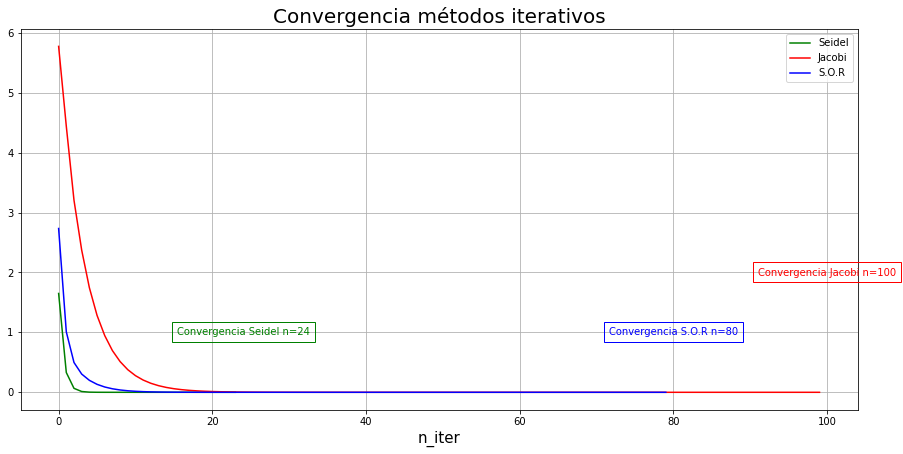

In [42]:
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize=(15, 7))

error_seidel = obtener_error(seidel, A_2, b_2)
error_jacobi = obtener_error(jacobi, A_2, b_2)
error_sor = obtener_error(sor, np.array(A_2), b_2)

conv_seidel = len(error_seidel)
conv_jacobi = len(error_jacobi)
conv_sor = len(error_sor)

ax.plot(error_seidel, "g", label="Seidel")
ax.plot(error_jacobi, "r", label="Jacobi")
ax.plot(error_sor, "b", label="S.O.R")

ax.text(conv_seidel, 1,  f'Convergencia Seidel n={conv_seidel}', color='green', ha="center", fontsize=10, va="center",
        bbox=dict(facecolor='none', edgecolor="green", pad=5.0))

ax.text(conv_jacobi, 2,  f'Convergencia Jacobi n={conv_jacobi}', color='red', ha="center", fontsize=10, va="center",
        bbox=dict(facecolor='none', edgecolor="red", pad=5.0))

ax.text(conv_sor, 1,  f'Convergencia S.O.R n={conv_sor}', color='blue', ha="center", fontsize=10, va="center",
        bbox=dict(facecolor='none', edgecolor="blue", pad=5.0))

plt.grid()
plt.legend()
plt.xlabel("n_iter", fontsize=15)
plt.title("Convergencia métodos iterativos", fontsize=20)
plt.show()

Como puede observarse en la gráfica, el método que proporciona la solución más aceptable para la matriz diagonalmente dominante seleccionada arbitrariamente es el método de Gauss - Seidel, dado que converge en un menor número de iteraciones. Cabe mencionar que, el método de S.O.R podría converger en menores iteraciones si se ajusta el parámetro $\omega$ adecuadamente.